## Spotify_Clustering
Data Analysis of Top Spotify songs applying EDA, different methods of dimension reduction (PCA, T-nse, umap), and different methods of clustering (K-Means, DBSCAN, Agglomerative) to determine best method of analysis and finding trends in music according to its different features

In [ ]:
#install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn plotly --quiet

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Here we import all necessary Python libraries for data manipulation, visualization, dimensionality reduction, and clustering.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading the dataset and displaying the first few rows to understand its structure and features.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/spotifygenre/topsongs.csv',encoding='latin1')
df.head(500)


Unnamed: 0                                   title        artist  \
0             1                        Hey, Soul Sister         Train   
1             2                    Love The Way You Lie        Eminem   
2             3                                 TiK ToK         Kesha   
3             4                             Bad Romance     Lady Gaga   
4             5                    Just the Way You Are    Bruno Mars   
..          ...                                     ...           ...   
495         496   We Don't Talk Anymore - DROELOE Remix  Charlie Puth   
496         497  Love Incredible (feat. Camila Cabello)  Cashmere Cat   
497         498       No Vacancy (with Sebastián Yatra)   OneRepublic   
498         499                                Rich Boy      Galantis   
499         500         Lust for Life (with The Weeknd)  Lana Del Rey   

           top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0         neo mellow  2010   97    89    67  -4     8   80  217     19     4   
1    detroit hip hop  2010   87    93    75  -5    52   64  263     24    23   
2          dance pop  2010  120    84    76  -3    29   71  200     10    14   
3          dance pop  2010  119    92    70  -4     8   71  295      0     4   
4                pop  2010  109    84    64  -5     9   43  221      2     4   
..               ...   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...   
495        dance pop  2017  100    82    70  -5    45   67  218     49    22   
496        downtempo  2017  167    50    37  -9    20   21  180      6    12   
497        dance pop  2017  100    76    69  -4    14   59  223      8     4   
498         big room  2017  110    90    74  -2     8   65  184      7     5   
499          art pop  2017  100    67    51  -9    36   27  264     58     6   

     pop  
0     83  
1     82  
2     80  
3     79  
4     78  
..   ...  
495   59  
496   59  
497   57  
498   55  
499   54  

[500 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


non-numerical data:


*   title
*   artist
*   top genre
*   year

numerical data:


*   year
*   nrgy - energy
*   dnce - danceability
*   db - loudness
*   live - live recording
*   val(valence) - positive mood
*   dur - duration
*   acous - acoustic
*   spch - speechiness
*   pop - popularity








In [ ]:
numeric_features = [ 'bpm', 'nrgy', 'dnce', 'dB', 'live',
                    'val', 'dur', 'acous', 'spch', 'pop']


In [ ]:

df[numeric_features].describe()


bpm        nrgy        dnce          dB        live         val  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean   118.545605   70.504146   64.379768   -5.578773   17.774461   52.225539   
std     24.795358   16.310664   13.378718    2.798020   13.102543   22.513020   
min      0.000000    0.000000    0.000000  -60.000000    0.000000    0.000000   
25%    100.000000   61.000000   57.000000   -6.000000    9.000000   35.000000   
50%    120.000000   74.000000   66.000000   -5.000000   12.000000   52.000000   
75%    129.000000   82.000000   73.000000   -4.000000   24.000000   69.000000   
max    206.000000   98.000000   97.000000   -2.000000   74.000000   98.000000   

              dur       acous        spch         pop  
count  603.000000  603.000000  603.000000  603.000000  
mean   224.674959   14.326700    8.358209   66.520730  
std     34.130059   20.766165    7.483162   14.517746  
min    134.000000    0.000000    0.000000    0.000000  
25%    202.000000    2.000000    4.000000   60.000000  
50%    221.000000    6.000000    5.000000   69.000000  
75%    239.500000   17.000000    9.000000   76.000000  
max    424.000000   99.000000   48.000000   99.000000

we first perform univariate analysis

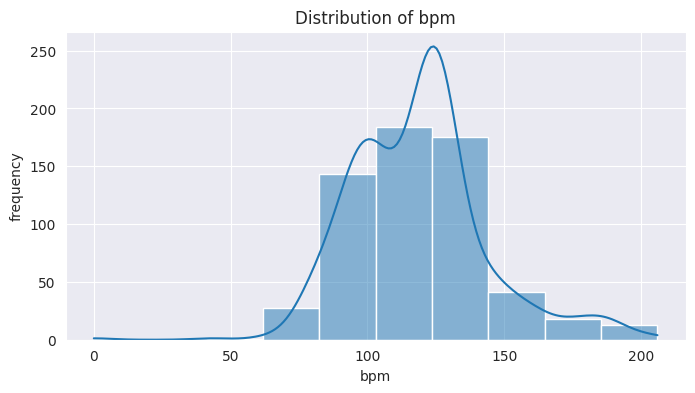

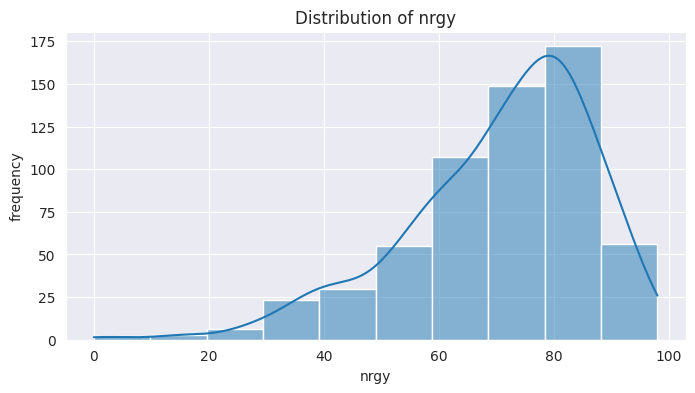

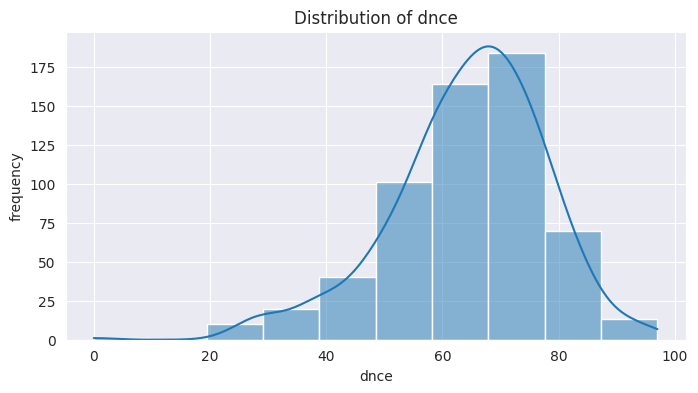

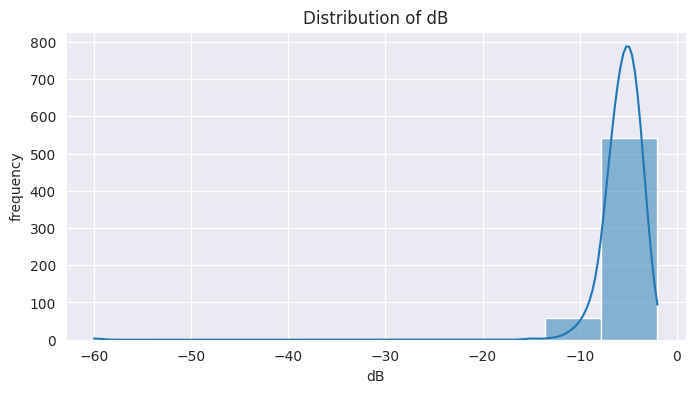

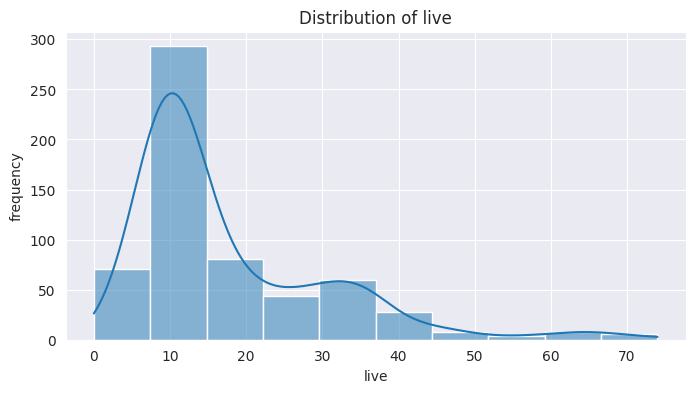

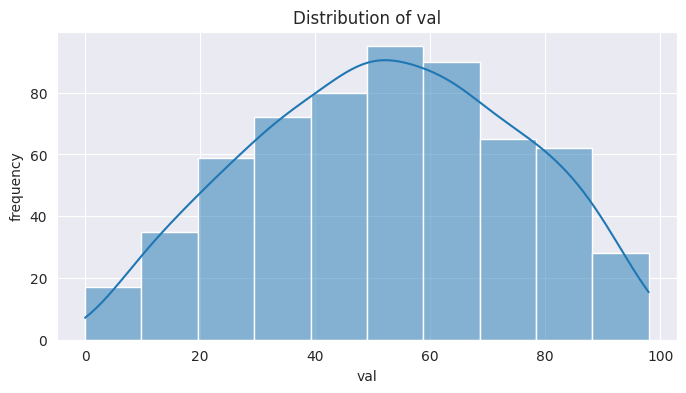

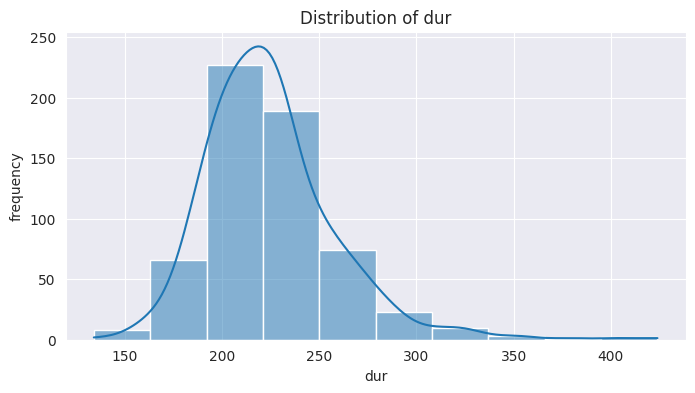

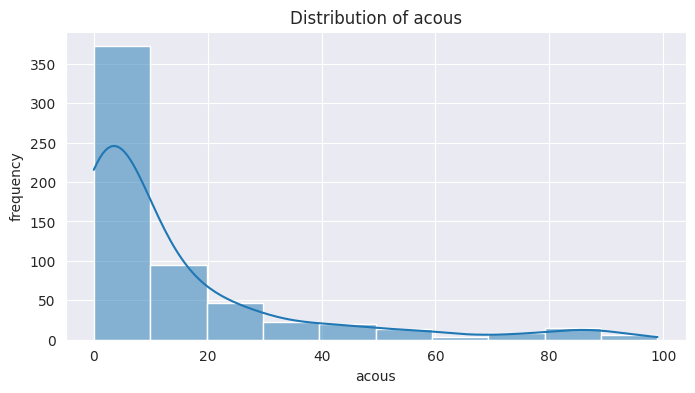

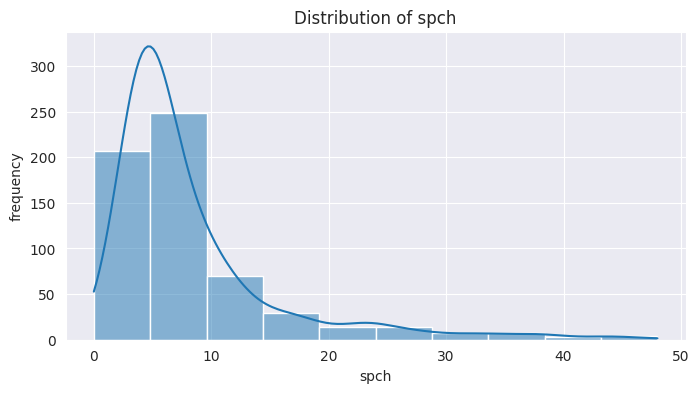

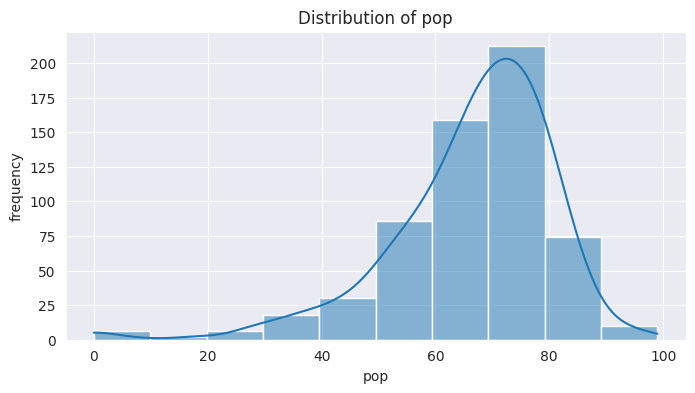

In [ ]:
sns.set_style('darkgrid')
for feature in numeric_features:
  plt.figure(figsize=(8,4))
  sns.histplot(df[feature],bins=10, kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.show()

nrgy (energy): Shows how energetic the songs are.

dnce (danceability): Indicates how suitable a track is for dancing.

db (loudness): Measures track loudness in dB.

live (live recording): Indicates if the track is live.

val (valence): Measures positivity or mood of the song.

dur (duration): Length of the track in milliseconds.

acous (acoustic): Measures how acoustic the track is.

spch (speechiness): Amount of spoken words in the track.

pop (popularity): Spotify popularity score (0–100).

# observations:
nrgy: follows a normal distribution

dnce: a high quantity of songs have high value of danceness

db: loudness lies between -9 to 0

live: a low quantity of songs have had live performances

val: follows a normal distribution

dur: follows a normal distribution

acous: very less songs are acoustic

spch: a low quantity songs are speechy

pop: most songs are popular


now, we perform bivariate analysis


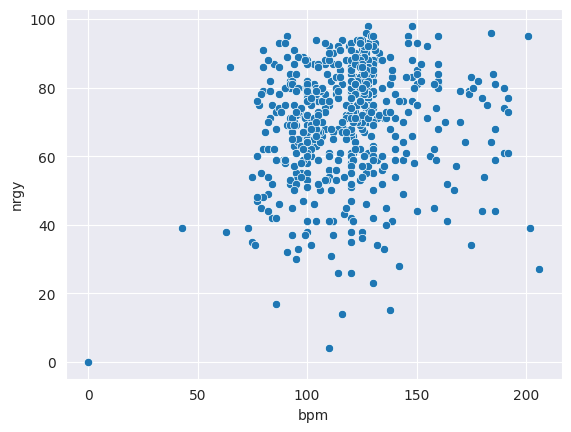

In [ ]:

sns.scatterplot(x='bpm', y='nrgy', data=df)
plt.show()


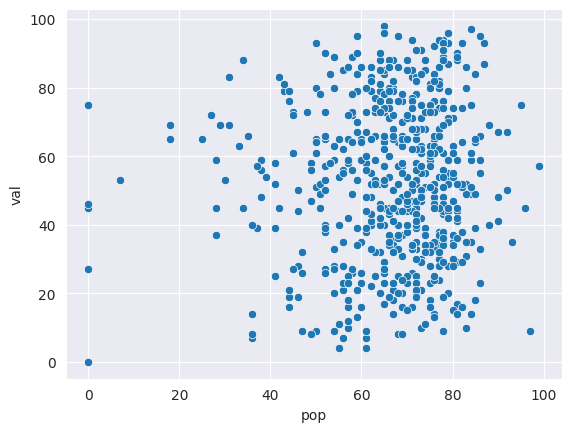

In [ ]:
sns.scatterplot(x='pop', y='val', data=df)
plt.show()

The scatterplot of popularity vs valence shows that all points are clustered toward the higher end of the popularity axis, while valence values are roughly evenly distributed. This clustering is not indicative of a correlation between popularity and valence; rather, it is a consequence of the dataset containing only popular songs. Less popular songs are underrepresented, making popularity a biased and unreliable dimension for analysis in this dataset.

Hence, popularity is not a meaningful dimension for this dataset, because it’s not representative of all songs.





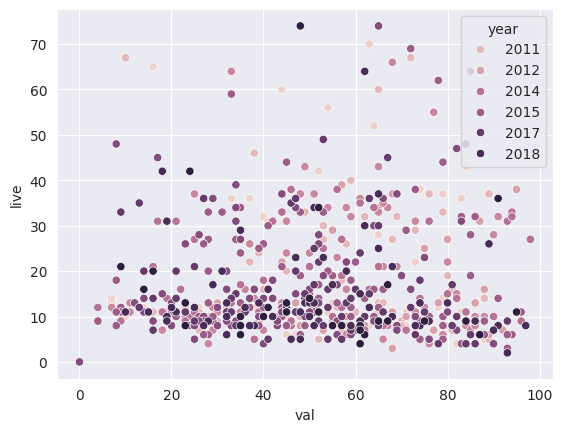

In [ ]:
sns.scatterplot(x='val', y='live', data=df, hue='year')
plt.show()

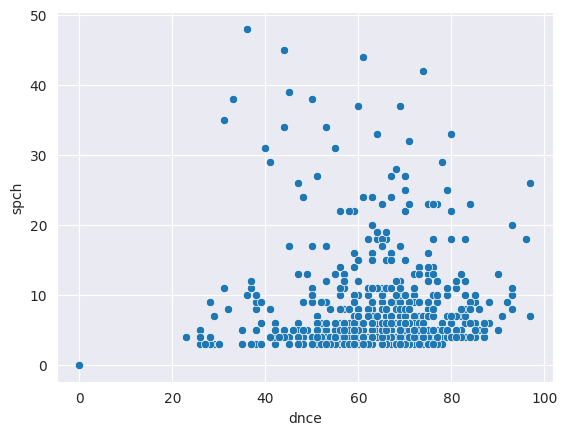

In [ ]:
sns.scatterplot(x='dnce', y='spch', data=df)
plt.show()

When plotting danceability against speechiness, there is a clear cluster of songs that have high danceability and low speechiness.
This suggests that most of the songs in this dataset are melodious rather than highly lyrical, implying that less lyrical, more melodic songs are preferred for dancing.

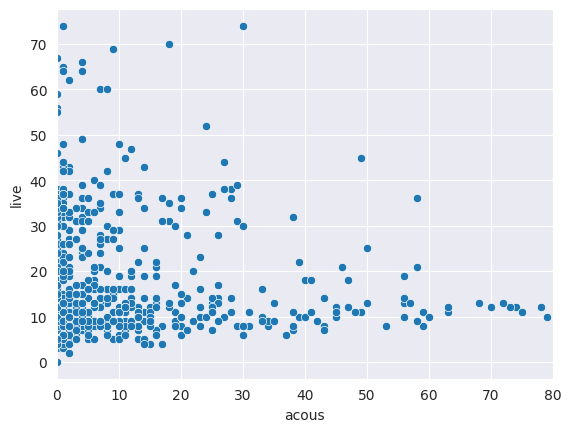

In [ ]:
sns.scatterplot(x='acous', y='live', data=df)
plt.xlim(0,80)

plt.show()


In the scatter plot of acous (acousticness) vs live (live recording), we can observe that:

Most songs are clustered toward low acousticness, meaning popular tracks are generally less acoustic.

The majority of songs are studio-recorded rather than live performances.

A few outliers with higher acousticness or live recordings exist, representing acoustic or live hits.

This suggests that mainstream chart-topping songs are primarily studio-produced and electronically mixed, with only a small fraction being acoustic or live.

<function matplotlib.pyplot.show(close=None, block=None)>

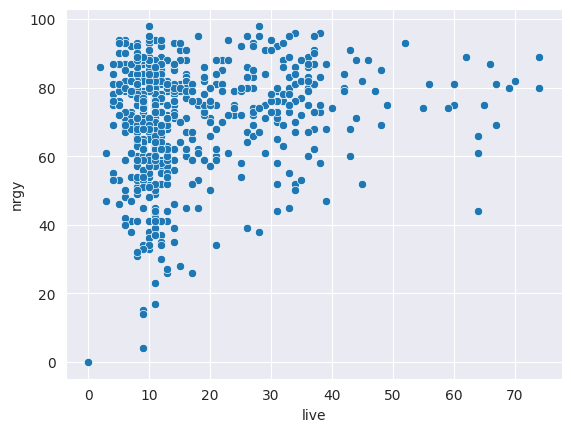

In [ ]:
sns.scatterplot(x='live', y='nrgy', data=df)


plt.show

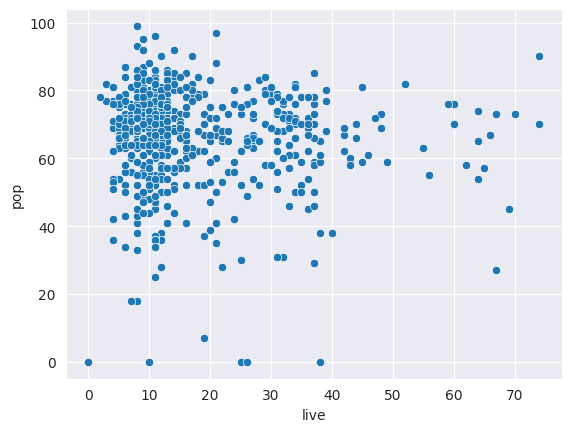

In [ ]:
sns.scatterplot(x='live', y='pop', data=df)
plt.show()

By 2010–2019, streaming platforms (Spotify, Apple Music, etc.) became dominant, so popularity could be measured instantly via streams.

Hits might get heavy exposure online, reducing the need for artists to perform them repeatedly live.

Conversely, less popular songs might be performed live to promote discovery or give hardcore fans something special.

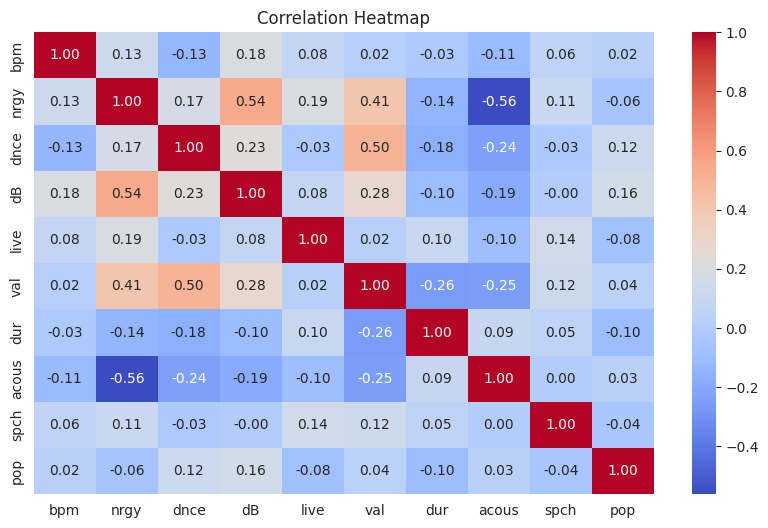

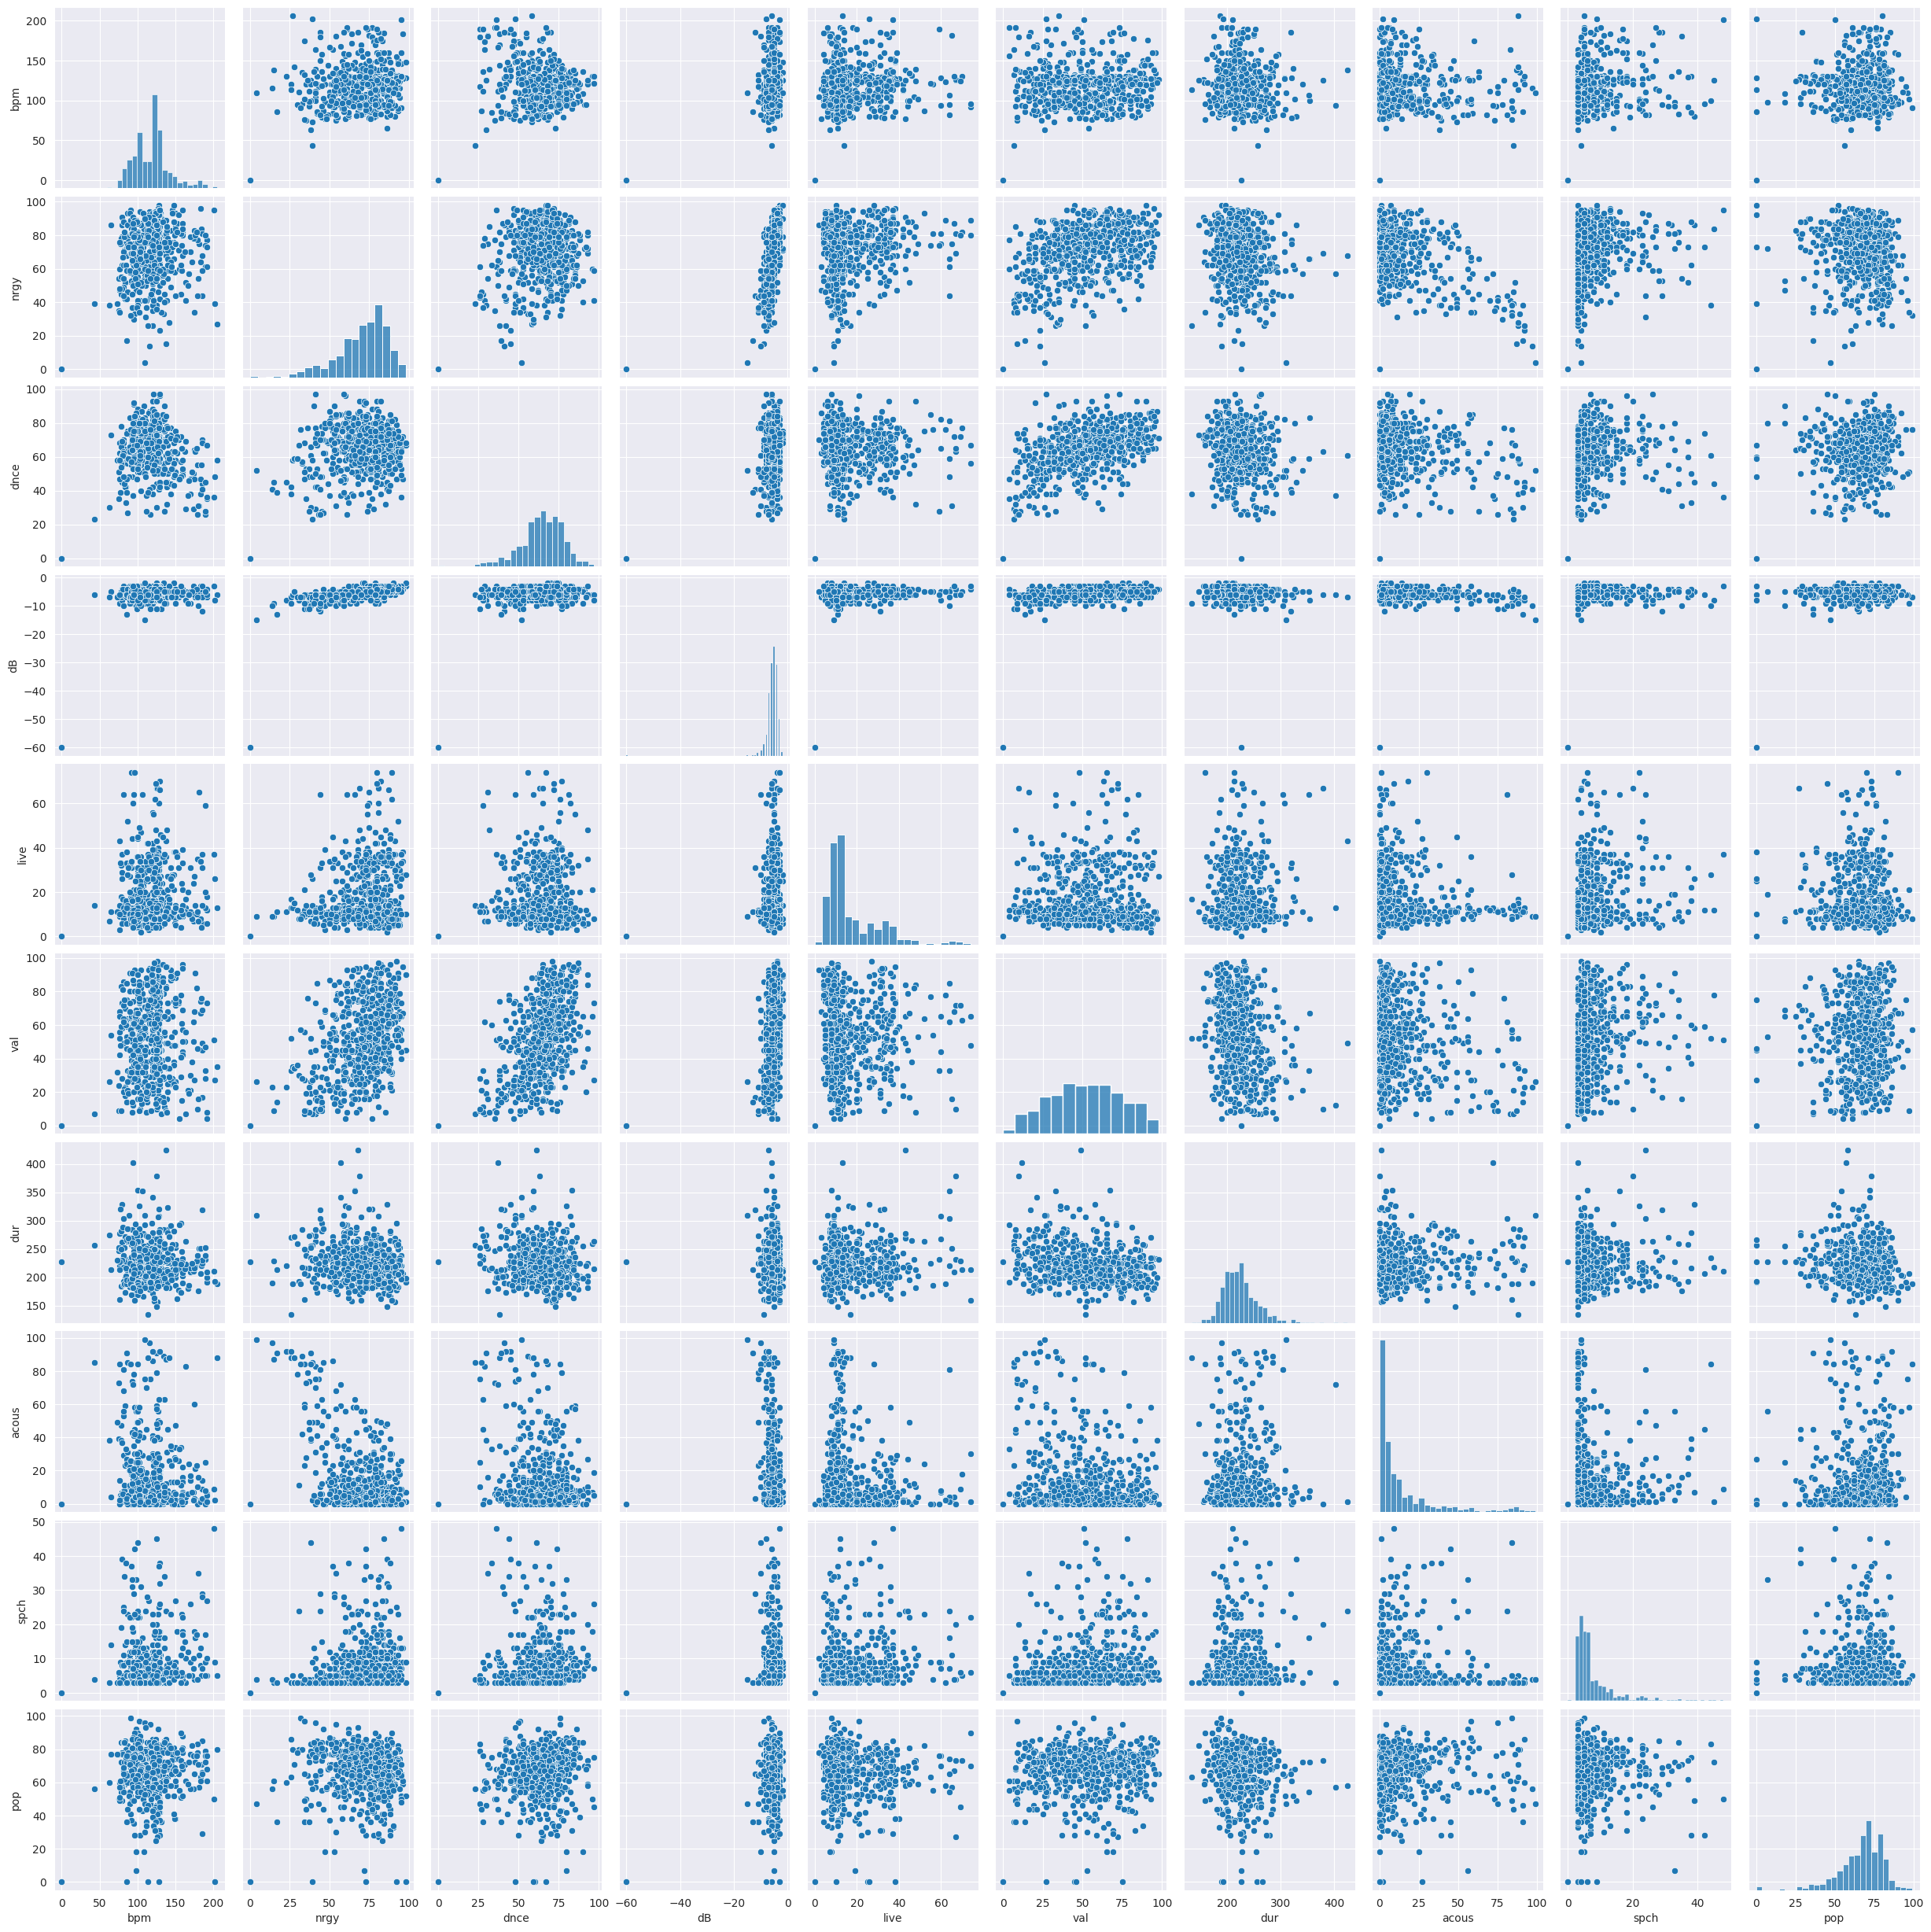

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df[numeric_features])
plt.show()


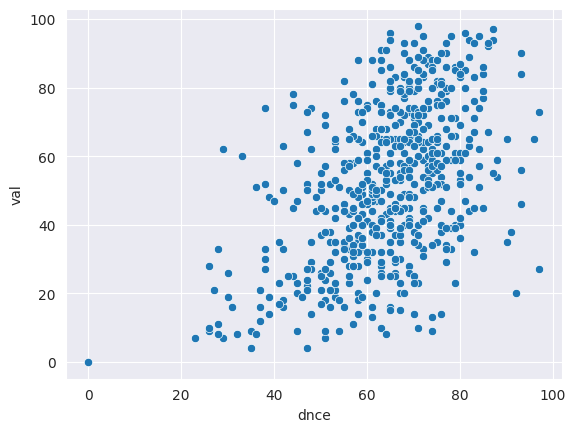

In [ ]:
sns.scatterplot(x='dnce', y='val', data=df)
plt.show()

In the scatter plot of dnce (danceability) vs val (valence):

Most songs are moderately to highly danceable and have positive valence, suggesting that popular tracks are upbeat and enjoyable.

A small cluster exists with high danceability but lower valence, representing energetic but possibly darker or less happy songs.

Songs with low danceability are scattered across all valence levels but are less common, indicating that top songs are generally rhythmic and mood-lifting.

Overall, there is a positive trend: higher danceability often corresponds to higher positivity.

In [ ]:
correlation_matrix = df[numeric_features].corr()  # by default, Pearson correlation
print(correlation_matrix)

            bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.126170 -0.131301  0.183870  0.081579  0.016021 -0.029359   
nrgy   0.126170  1.000000  0.167209  0.537528  0.186738  0.409577 -0.143610   
dnce  -0.131301  0.167209  1.000000  0.233170 -0.028801  0.501696 -0.176841   
dB     0.183870  0.537528  0.233170  1.000000  0.081934  0.282922 -0.104723   
live   0.081579  0.186738 -0.028801  0.081934  1.000000  0.020226  0.098339   
val    0.016021  0.409577  0.501696  0.282922  0.020226  1.000000 -0.262256   
dur   -0.029359 -0.143610 -0.176841 -0.104723  0.098339 -0.262256  1.000000   
acous -0.113257 -0.562287 -0.240064 -0.190401 -0.098167 -0.249038  0.091802   
spch   0.058999  0.107313 -0.028041 -0.001110  0.144103  0.122013  0.054564   
pop    0.018983 -0.057645  0.116054  0.156897 -0.075749  0.038953 -0.104363   

          acous      spch       pop  
bpm   -0.113257  0.058999  0.018983  
nrgy  -0.562287  0.107313 -0.057645  
dnce  -0.240064 

1. Strong positive correlations

Valence vs. Danceability (0.50)

Happier songs tend to be more danceable.

Makes sense: upbeat, positive tracks are usually easier to dance to.

Energy vs. Loudness (0.54)

Loud songs are generally more energetic.

Typical of pop, electronic, and rock tracks.

Energy vs. Valence (0.41)

Energetic songs tend to be happier.

Energetic, positive songs dominate your dataset.

2. Strong negative correlations

Energy vs. Acousticness (-0.56)

Acoustic tracks are generally less energetic.

Suggests a clear separation between acoustic/soft songs and energetic/electronic songs.

Danceability vs. Acousticness (-0.24)

Danceable tracks are less likely to be acoustic.

Reinforces that acoustic songs are often slower or less rhythmic.

Valence vs. Duration (-0.26)

Longer songs tend to be slightly less happy.

Could indicate that slower, longer tracks are less upbeat.

3. Weak or negligible correlations

Live performances (live)

Almost no correlation with other features (highest ~0.14 with speechiness).

Suggests that live performance frequency is not determined by popularity, energy, valence, or danceability.

Supports your observation that less popular songs sometimes get performed more often.

Popularity (pop)

Mostly low correlations with all musical features (highest ~0.16 with loudness).

Popularity does not strongly depend on energy, valence, or danceability in your dataset.

4. Feature clusters / patterns

Acoustic cluster: low energy, low danceability, higher acousticness.

Energetic/happy cluster: high valence, high energy, high danceability.

Live performance independence: no strong link to other features → could reflect artist-specific choices, tour themes, or fan engagement.

5. Actionable insights

To predict danceability, focus on valence and energy.

To identify acoustic tracks, check for low energy and high acousticness.

Live shows analysis requires a separate approach: features like popularity or energy alone cannot explain live performance frequency.

/tmp/ipython-input-2501482885.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0],X_pca[:,1], cmap='viridis' )


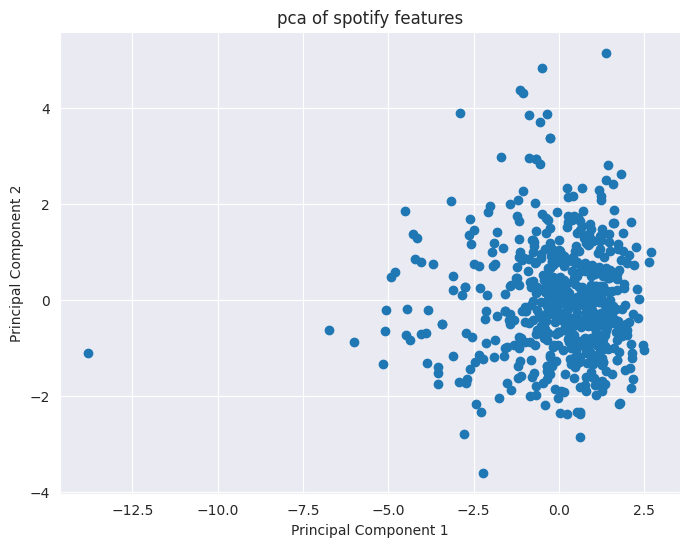

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('pca of spotify features')
plt.scatter(X_pca[:,0],X_pca[:,1], cmap='viridis' )

plt.show()

the points are too concentrated, this could suggest the data is non-linear for the most part

checking varience ratio to determine if the data is linear or non-linear




In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())


[0.25000051 0.14365089]
[0.25000051 0.3936514 ]


thus, we determine that this dataset is largely non-linear

PCA is not a suitable dimensional analysis method for this dataset since it deals with linear data

Applying TSNE

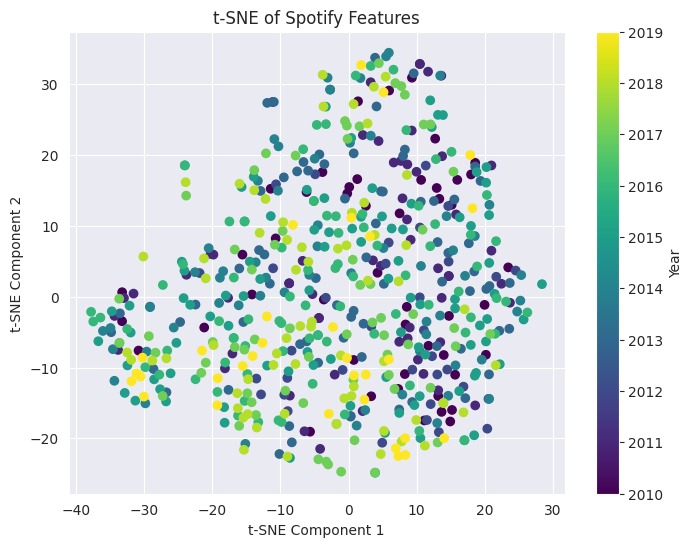

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('t-SNE of Spotify Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Dimensionality Reduction: PCA vs t-SNE



When comparing PCA and t-SNE on the Spotify dataset:

PCA shows points mostly overlapping, reflecting overall variance but without clear separation between songs.

t-SNE spreads the points more than PCA, highlighting subtle differences in song features, but does not produce distinct clusters.

The spread indicates a continuous distribution of song characteristics rather than discrete groups.

This suggests that top Spotify songs vary along multiple dimensions (danceability, energy, acousticness, valence, etc.) but do not naturally form separate clusters.

Even without clusters, the spread is useful for visualizing regions of higher density and understanding relationships between features.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


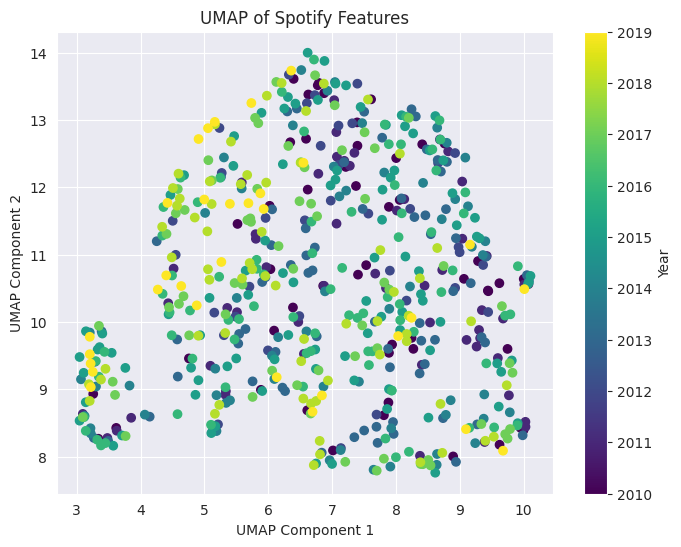

In [ ]:
import umap

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('UMAP of Spotify Features')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


took 54 seconds


# Dimensionality Reduction Observations



After applying PCA, t-SNE, and UMAP to the Spotify dataset:

PCA shows points mostly overlapping, giving a general sense of variance but no distinct clusters.

t-SNE spreads the points out more compared to PCA, highlighting subtle differences between songs, but no clear clusters appear.

UMAP also spreads the points, often more evenly than t-SNE, showing the distribution and density of songs across feature space, but again, no distinct clusters are present.

This suggests that popular songs have continuous variation in features (danceability, energy, acousticness, valence, etc.) rather than forming separate, isolated groups.

The spread is still informative, as we can visually identify regions with high danceability, high energy, or low acousticness, even if they don’t form discrete clusters.

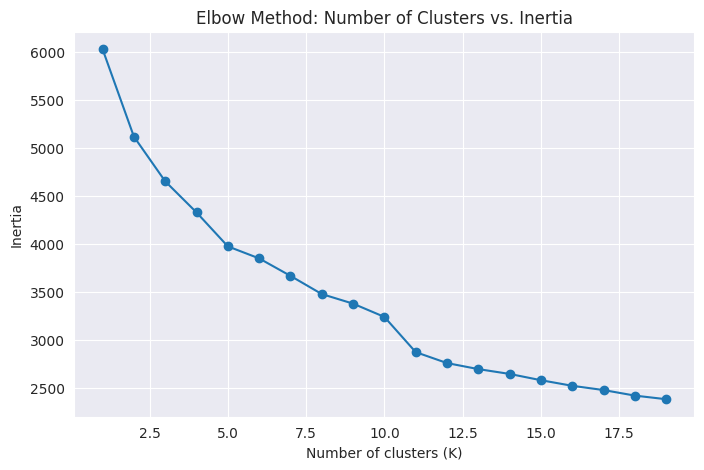

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

options = range(1, 20)  # test 1 to 9 clusters
inertias = []

for n_clusters in options:
    km = KMeans(n_clusters=n_clusters, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(options, inertias, '-o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method: Number of Clusters vs. Inertia")
plt.show()

The Elbow Method is primarily for K-Means (or similar centroid-based algorithms). For density-based or hierarchical clustering, other methods like dendrogram analysis, silhouette score, or parameter tuning are used.

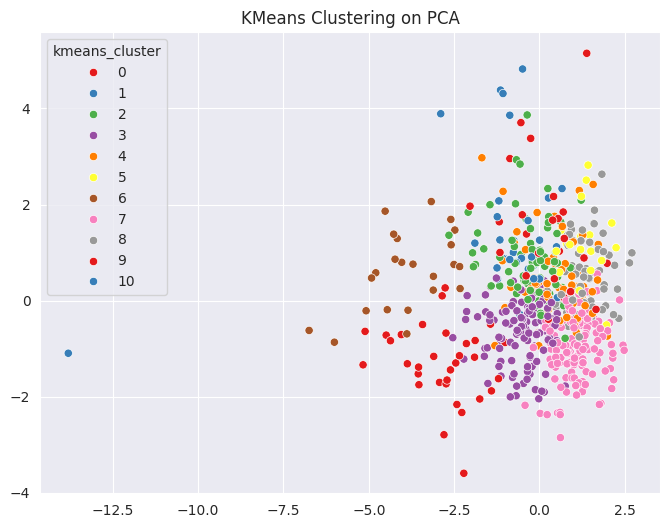

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=11, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot KMeans results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title('KMeans Clustering on PCA')
plt.show()

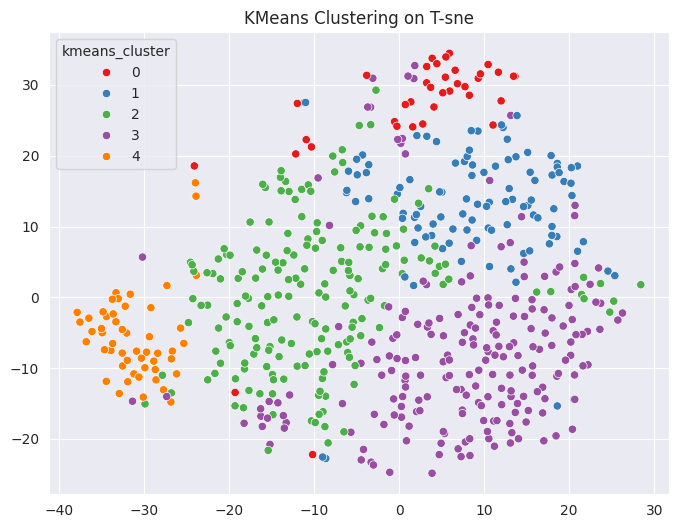

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot KMeans results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title('KMeans Clustering on T-sne')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in [5, 11]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")


k=5, silhouette score=0.128
k=11, silhouette score=0.121


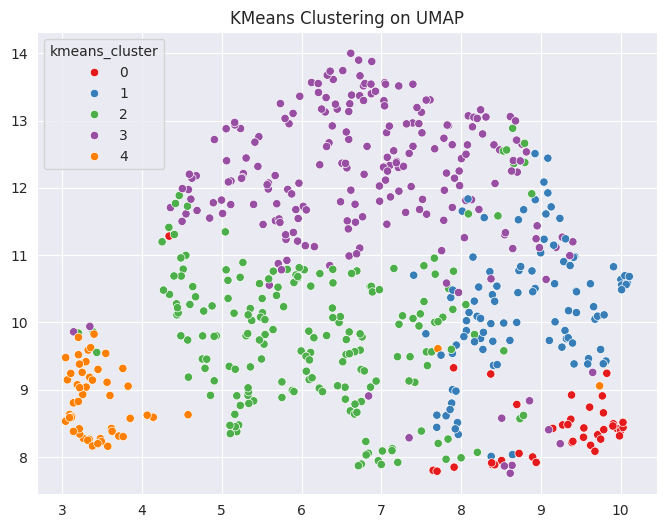

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot KMeans results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title('KMeans Clustering on UMAP')
plt.show()

# K-Means on PCA vs t-SNE vs UMAP



When applying K-Means on different dimensionality-reduced embeddings:

PCA: K-Means clusters are overlapping, with some grouping visible but not clearly separated.

t-SNE: Points are more spread out, and clusters are slightly more defined compared to PCA.

UMAP: Provides the most spread-out and well-defined clusters, making similar songs easier to visually distinguish.

Overall, while none of the embeddings produce perfectly discrete clusters, UMAP + K-Means gives the most interpretable separation of song features, followed by t-SNE, with PCA showing the least separation.

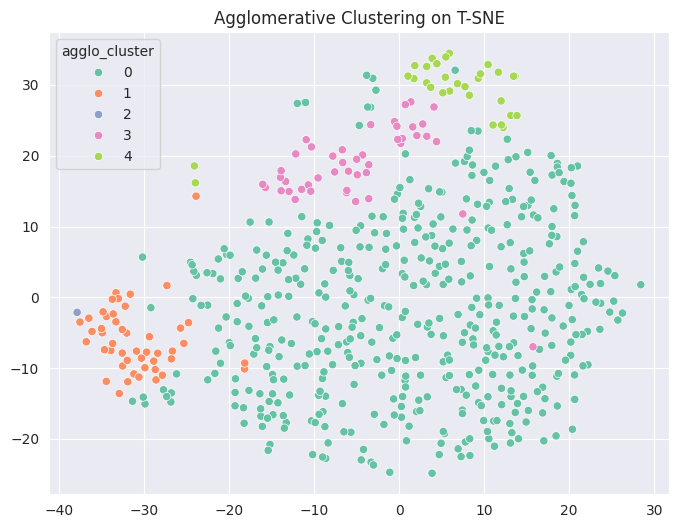

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['agglo_cluster'] = agglo.fit_predict(X_scaled)

# Plot Agglomerative Clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['agglo_cluster'], palette='Set2')
plt.title('Agglomerative Clustering on T-SNE')
plt.show()


Agglomerative Clustering:

Not very useful here.

The dataset has no strong linear or hierarchical dependencies, so hierarchical merging does not reveal meaningful clusters.

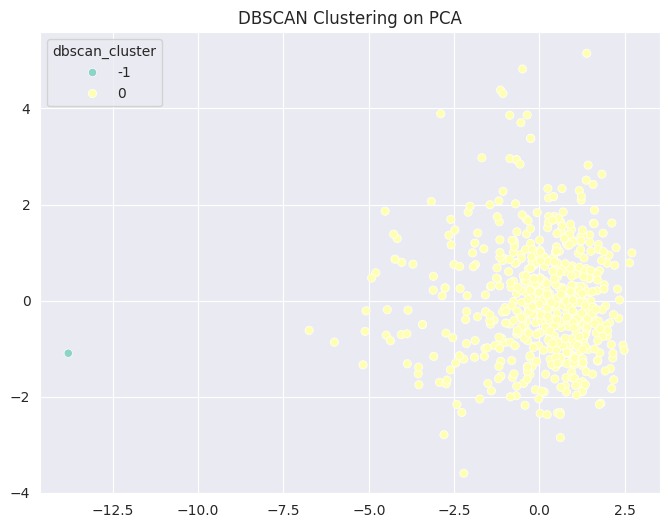

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['dbscan_cluster'], palette='Set3')
plt.title('DBSCAN Clustering on PCA')
plt.show()

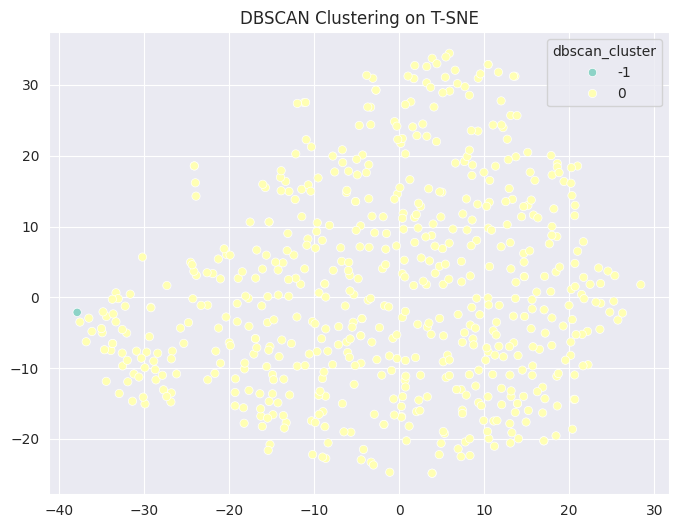

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['dbscan_cluster'], palette='Set3')
plt.title('DBSCAN Clustering on T-SNE')
plt.show()


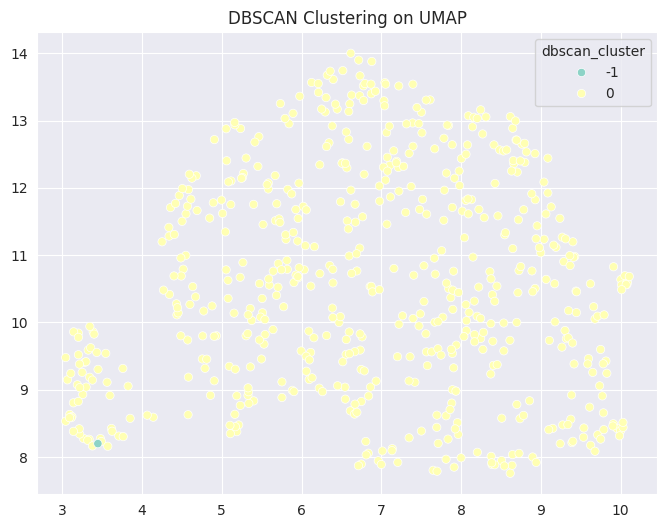

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['dbscan_cluster'], palette='Set3')
plt.title('DBSCAN Clustering on UMAP')
plt.show()

# DBSCAN Clustering Observations



When applying DBSCAN to the Spotify dataset:

DBSCAN labels almost all points as 0 or 1, indicating either a single cluster or all points as noise.

This happens because DBSCAN relies on dense regions of points to define clusters.

Our dataset has continuous variation in features without clearly dense regions, so DBSCAN cannot find meaningful clusters.

As a result, DBSCAN is not effective for this dataset.

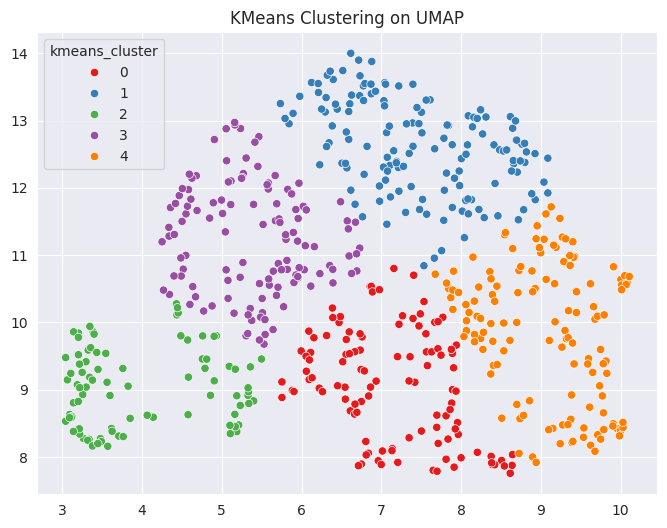

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans on UMAP embeddings
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_umap)

# Plot KMeans results on UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title('KMeans Clustering on UMAP')
plt.show()


In [ ]:
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

# UMAP
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Function to apply KMeans and add labels
def kmeans_labels(X_emb, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_emb)
    return labels

df['kmeans_pca'] = kmeans_labels(X_pca)
df['kmeans_tsne'] = kmeans_labels(X_tsne)
df['kmeans_umap'] = kmeans_labels(X_umap)


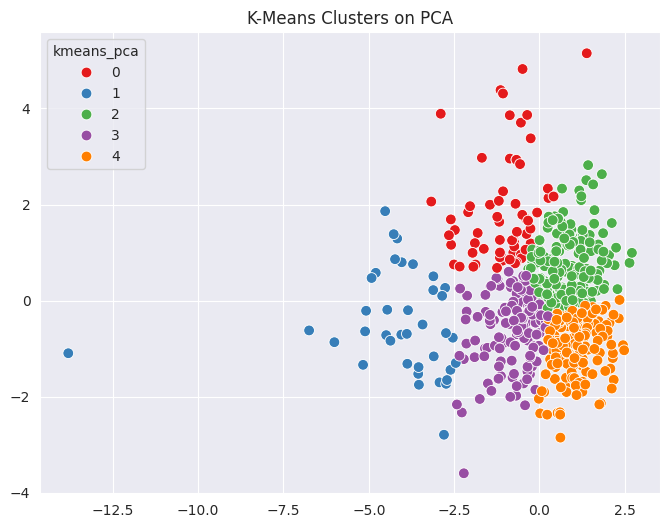

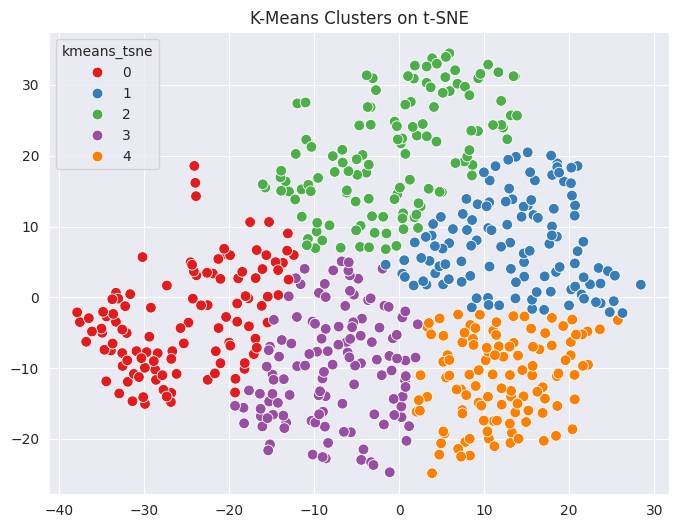

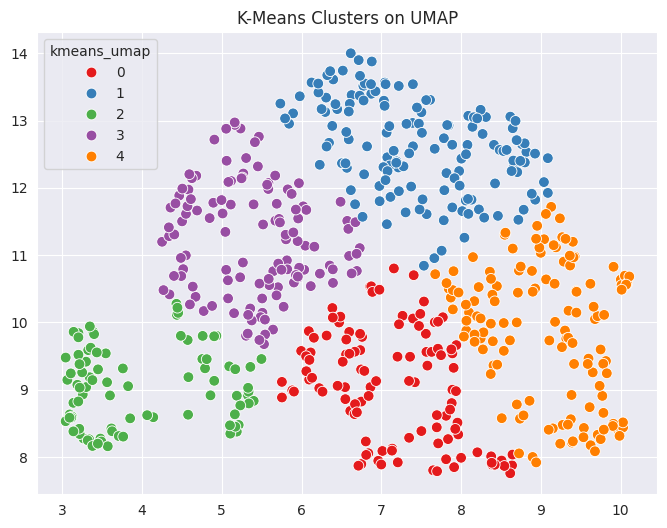

In [ ]:
# Plotting function
def plot_clusters(X_emb, labels, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=labels, palette='Set1', s=60)
    plt.title(title)
    plt.show()

plot_clusters(X_pca, df['kmeans_pca'], 'K-Means Clusters on PCA')
plot_clusters(X_tsne, df['kmeans_tsne'], 'K-Means Clusters on t-SNE')
plot_clusters(X_umap, df['kmeans_umap'], 'K-Means Clusters on UMAP')


In [ ]:
# Example: mean feature values per cluster
pca_summary = df.groupby('kmeans_pca')[numeric_features].mean()
tsne_summary = df.groupby('kmeans_tsne')[numeric_features].mean()
umap_summary = df.groupby('kmeans_umap')[numeric_features].mean()

print("PCA Clusters Summary:\n", pca_summary)
print("\nTSNE Clusters Summary:\n", tsne_summary)
print("\nUMAP Clusters Summary:\n", umap_summary)


PCA Clusters Summary:
                    bpm       nrgy       dnce        dB       live        val  \
kmeans_pca                                                                     
0           134.196970  67.863636  49.378788 -6.227273  25.818182  32.378788   
1           109.400000  33.875000  45.775000 -9.275000  12.325000  23.125000   
2           126.326316  80.994737  63.957895 -4.747368  24.942105  58.305263   
3           108.792857  61.728571  65.721429 -6.264286  12.650000  39.442857   
4           113.874251  75.742515  74.119760 -4.808383  12.041916  70.838323   

                   dur      acous       spch        pop  
kmeans_pca                                               
0           262.954545  12.787879  12.954545  58.939394  
1           241.075000  68.900000   5.350000  63.175000  
2           223.163158   6.778947   9.952632  62.647368  
3           225.778571  17.371429   6.357143  70.878571  
4           206.413174   7.898204   7.125749  71.071856  

TSNE Clus

In [ ]:
# Function to apply Agglomerative Clustering
def agglomerative_labels(X_emb, n_clusters=5):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X_emb)
    return labels

# Assign labels for each embedding
df['agg_pca'] = agglomerative_labels(X_pca)
df['agg_tsne'] = agglomerative_labels(X_tsne)
df['agg_umap'] = agglomerative_labels(X_umap)


In [ ]:
# Function to apply DBSCAN
def dbscan_labels(X_emb, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_emb)
    return labels

# Assign labels for each embedding
df['dbscan_pca'] = dbscan_labels(X_pca, eps=5, min_samples=5)
df['dbscan_tsne'] = dbscan_labels(X_tsne, eps=5, min_samples=5)
df['dbscan_umap'] = dbscan_labels(X_umap, eps=5, min_samples=5)


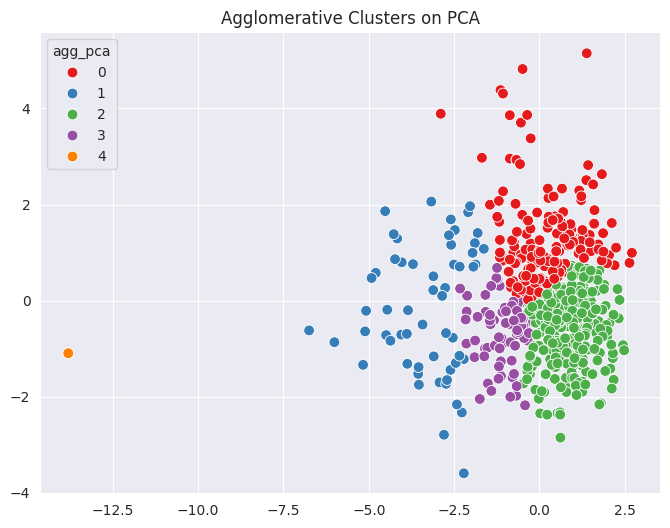

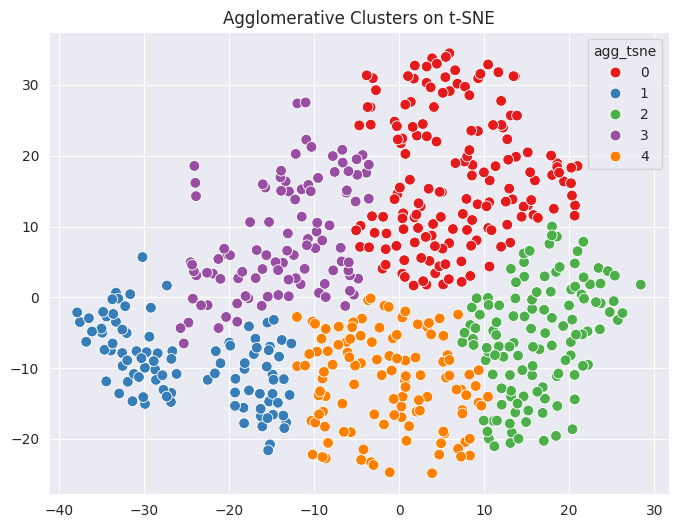

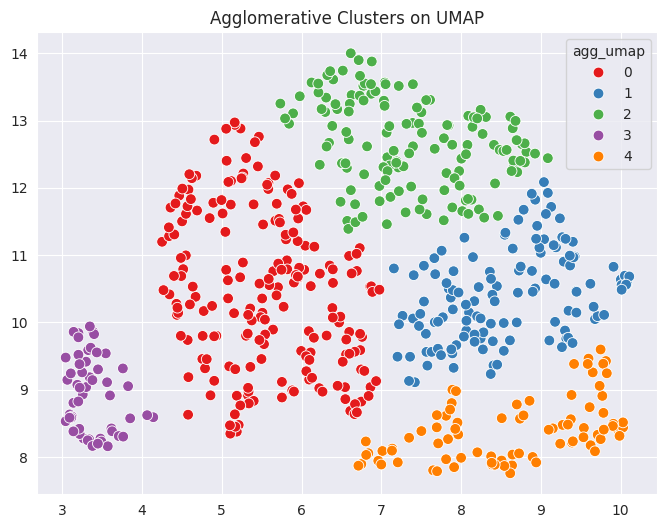

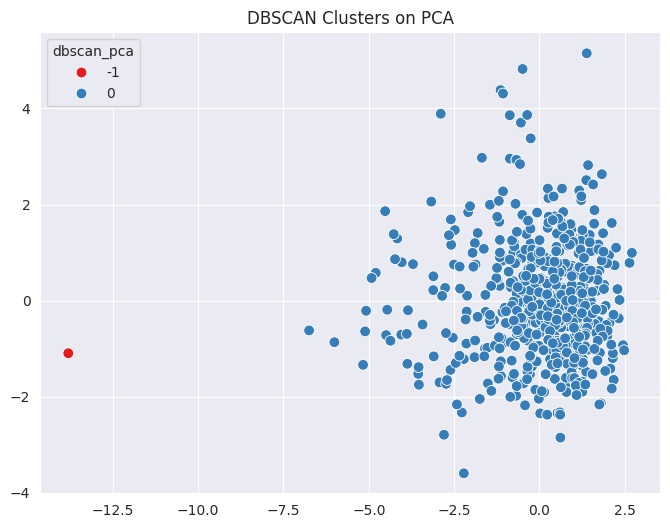

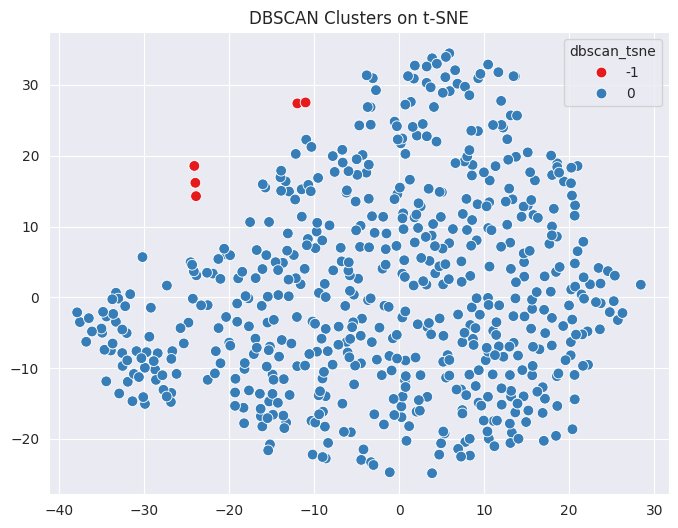

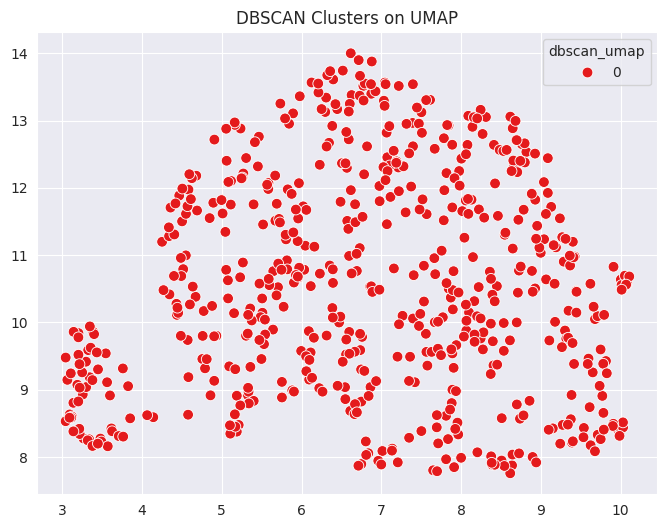

In [ ]:
def plot_clusters(X_emb, labels, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=labels, palette='Set1', s=60)
    plt.title(title)
    plt.show()

# Agglomerative
plot_clusters(X_pca, df['agg_pca'], 'Agglomerative Clusters on PCA')
plot_clusters(X_tsne, df['agg_tsne'], 'Agglomerative Clusters on t-SNE')
plot_clusters(X_umap, df['agg_umap'], 'Agglomerative Clusters on UMAP')

# DBSCAN
plot_clusters(X_pca, df['dbscan_pca'], 'DBSCAN Clusters on PCA')
plot_clusters(X_tsne, df['dbscan_tsne'], 'DBSCAN Clusters on t-SNE')
plot_clusters(X_umap, df['dbscan_umap'], 'DBSCAN Clusters on UMAP')


In [ ]:
features = ['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']

# Agglomerative summary
agg_pca_summary = df.groupby('agg_pca')[features].mean()
agg_tsne_summary = df.groupby('agg_tsne')[features].mean()
agg_umap_summary = df.groupby('agg_umap')[features].mean()

# DBSCAN summary
dbscan_pca_summary = df.groupby('dbscan_pca')[features].mean()
dbscan_tsne_summary = df.groupby('dbscan_tsne')[features].mean()
dbscan_umap_summary = df.groupby('dbscan_umap')[features].mean()

print("Agglomerative PCA Summary:\n", agg_pca_summary)
print("\nDBSCAN PCA Summary:\n", dbscan_pca_summary)


Agglomerative PCA Summary:
                 bpm       nrgy       dnce         dB       live        val  \
agg_pca                                                                      
0        130.158192  77.158192  58.983051  -5.254237  27.248588  47.384181   
1        117.644068  40.644068  47.152542  -7.728814  13.101695  25.474576   
2        115.154110  75.876712  71.109589  -4.859589  14.513699  65.068493   
3        106.472973  58.148649  65.337838  -6.743243  11.945946  35.162162   
4          0.000000   0.000000   0.000000 -60.000000   0.000000   0.000000   

                dur      acous       spch        pop  
agg_pca                                               
0        236.717514   8.514124  11.796610  60.276836  
1        243.288136  58.372881   6.322034  65.661017  
2        212.061644   8.082192   7.273973  69.373288  
3        230.770270  17.945946   6.148649  71.783784  
4        227.000000   0.000000   0.000000   0.000000  

DBSCAN PCA Summary:
                   